In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

Text(0.5, 1.0, 'android os z')

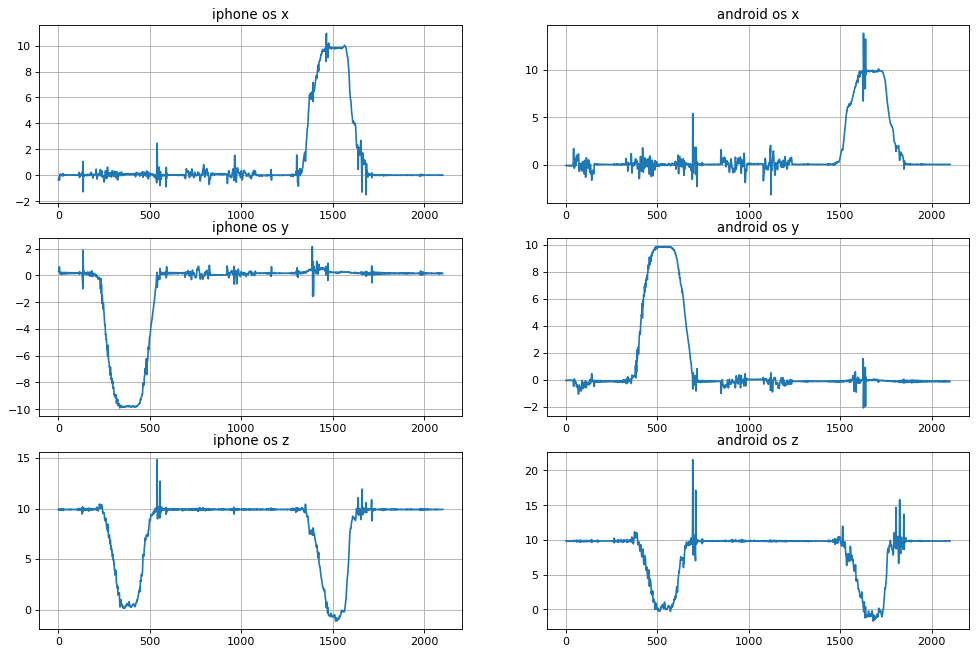

In [2]:
acelMich = pd.read_csv('Michal/AccelerometerUncalibrated.csv').drop(columns = ['time', 'seconds_elapsed'])
acelKasper = pd.read_csv('Kasper/AccelerometerUncalibrated.csv').drop(columns = ['time', 'seconds_elapsed'])

figure(figsize=(15, 10), dpi=80)



plt.subplot(3,2,1)
plt.plot(acelKasper['x'] * 9.81)
plt.grid()
plt.title('iphone os x')

plt.subplot(3,2,2)
plt.plot(acelMich['x'])
plt.grid()
plt.title('android os x')

plt.subplot(3,2,3)
plt.plot(acelKasper['y'] * 9.81)
plt.grid()
plt.title('iphone os y')

plt.subplot(3,2,4)
plt.plot(acelMich['y'])
plt.grid()
plt.title('android os y')

plt.subplot(3,2,5)
plt.plot(acelKasper['z'] * 9.81)
plt.grid()
plt.title('iphone os z')

plt.subplot(3,2,6)
plt.plot(acelMich['z'])
plt.grid()
plt.title('android os z')

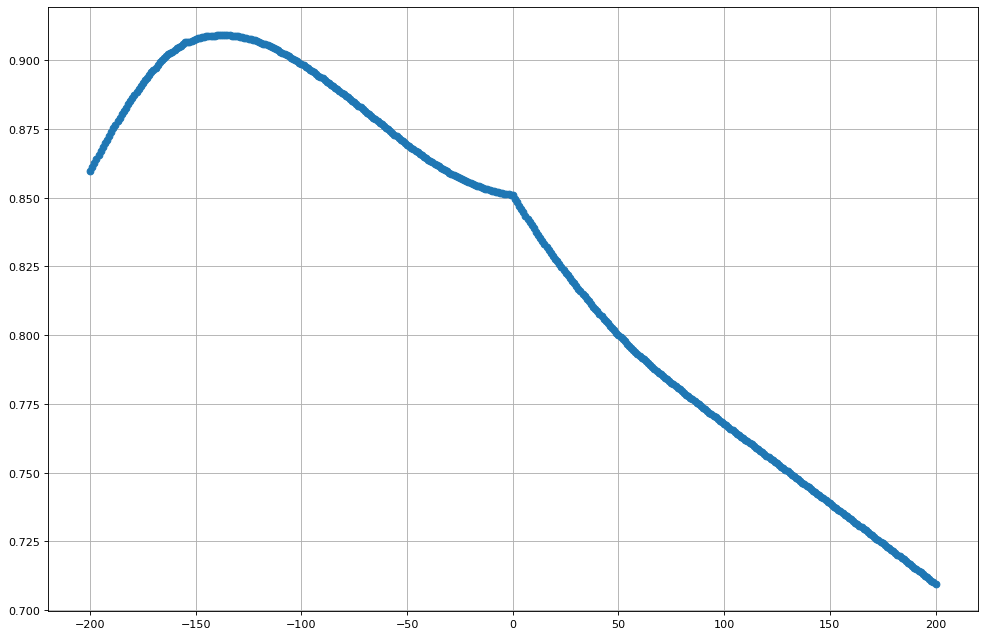

In [3]:
figure(figsize=(15, 10), dpi=80)
plt.xcorr(acelKasper["z"], acelMich["z"], usevlines=False, maxlags=200, normed=True, lw=5)
plt.grid(True)


Text(0.5, 1.0, 'android os z')

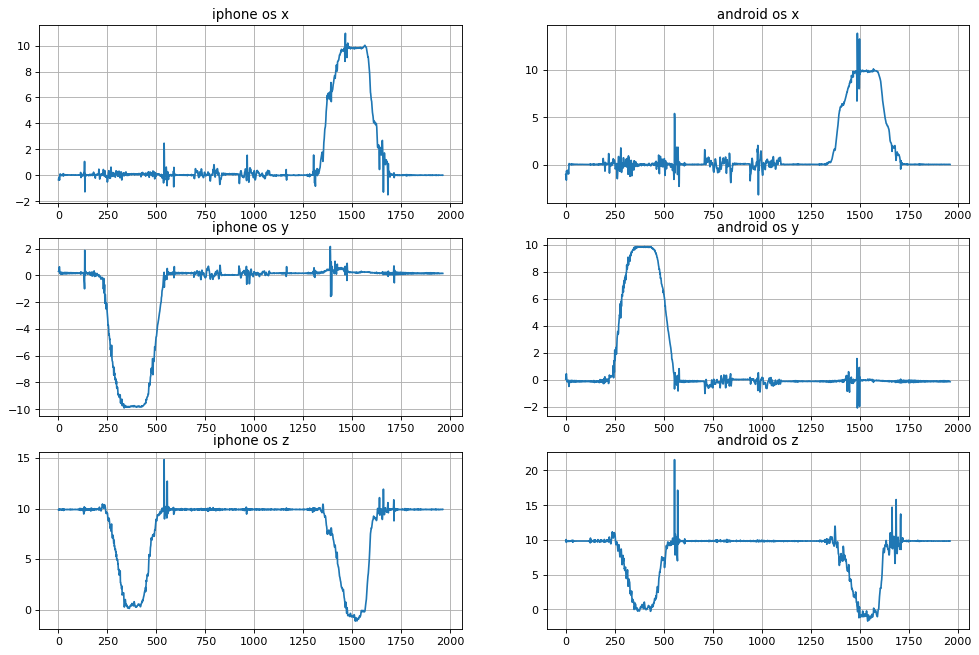

In [4]:
figure(figsize=(15, 10), dpi=80)

acelKasper = acelKasper[:-139].reset_index(drop=True)
acelMich = acelMich[139:].reset_index(drop=True)

plt.subplot(3,2,1)
plt.plot(acelKasper['x'] * 9.81)
plt.grid()
plt.title('iphone os x')

plt.subplot(3,2,2)
plt.plot(acelMich['x'])
plt.grid()
plt.title('android os x')

plt.subplot(3,2,3)
plt.plot(acelKasper['y'] * 9.81)
plt.grid()
plt.title('iphone os y')

plt.subplot(3,2,4)
plt.plot(acelMich['y'])
plt.grid()
plt.title('android os y')

plt.subplot(3,2,5)
plt.plot(acelKasper['z'] * 9.81)
plt.grid()
plt.title('iphone os z')

plt.subplot(3,2,6)
plt.plot(acelMich['z'])
plt.grid()
plt.title('android os z')


In [5]:
acelKasper.corrwith(acelMich, axis = 0)

z    0.932389
y   -0.984334
x    0.950405
dtype: float64

Text(0.5, 1.0, 'roznica os z')

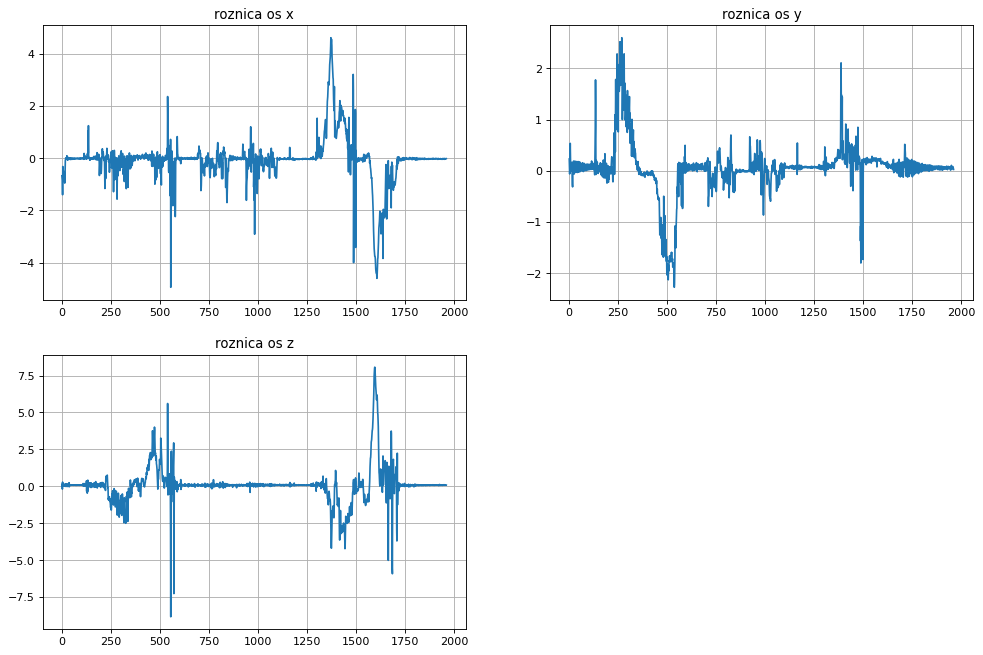

In [6]:
new = pd.DataFrame()

new['x'] =abs(acelKasper['x'] * 9.81) - abs(acelMich['x'])
new['y'] = abs(acelKasper['y'] * 9.81) - abs(acelMich['y'])
new['z'] = abs(acelKasper['z'] * 9.81) - abs(acelMich['z'])


figure(figsize=(15, 10), dpi=80)



plt.subplot(2,2,1)
plt.plot(new['x'])
plt.grid()
plt.title('roznica os x')

plt.subplot(2,2,2)
plt.plot(new['y'])
plt.grid()
plt.title('roznica os y')

plt.subplot(2,2,3)
plt.plot(new['z'])
plt.grid()
plt.title('roznica os z')